# Projektna naloga
Uvod v programiranje (FM) 2024/25, Vijan Pavlin <br><br>
V tem Jupyter Notebooku je vsebovana celota moje projektne naloge: Zajem podatkov, predelava, shranjevanje, analiza ter predstavitev celotnega procesa vse skupaj z navodili za uporabo.

## Zajem podatkov


(delčki kode so označeni s številko v komentarju) <br>
Najprej zaženemo kodo 1.

In [ ]:
#1
import requests

# preprečimo da bi imdb podal podatke v slovenščini ter 403 error, tako da se predstavimo kot uporabnik Mozila iskalnika
headers = {"Accept-Language": "en-US,en;q=0.5",
"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"}


Potem zaženemo kodo 2 da shranimo podatke iz IMDB spletne strani v html datoteke.

In [ ]:
#2
# zajamemo željeno število podatkov iz izbrane spletne strani in jih sharnimo v ločene html datoteke
st_strani = 20

for stran in range(1, st_strani+1):
    url = f"https://www.imdb.com/list/ls063676189/?page={stran}"
    odziv = requests.get(url, headers=headers)
    if odziv.status_code == 200:
        #izpišemo naslove spletnih strani da se prepričamo da so pravilni
        print(url)
        with open(f"stran-{stran}.html", "w") as f:
            f.write(odziv.text)
    else:
        print("Prišlo je do napake")


https://www.imdb.com/list/ls063676189/?page=1
https://www.imdb.com/list/ls063676189/?page=2
https://www.imdb.com/list/ls063676189/?page=3
https://www.imdb.com/list/ls063676189/?page=4
https://www.imdb.com/list/ls063676189/?page=5
https://www.imdb.com/list/ls063676189/?page=6
https://www.imdb.com/list/ls063676189/?page=7
https://www.imdb.com/list/ls063676189/?page=8
https://www.imdb.com/list/ls063676189/?page=9
https://www.imdb.com/list/ls063676189/?page=10
https://www.imdb.com/list/ls063676189/?page=11
https://www.imdb.com/list/ls063676189/?page=12
https://www.imdb.com/list/ls063676189/?page=13
https://www.imdb.com/list/ls063676189/?page=14
https://www.imdb.com/list/ls063676189/?page=15
https://www.imdb.com/list/ls063676189/?page=16
https://www.imdb.com/list/ls063676189/?page=17
https://www.imdb.com/list/ls063676189/?page=18
https://www.imdb.com/list/ls063676189/?page=19
https://www.imdb.com/list/ls063676189/?page=20


Koda 3 naredi enako kot koda 2 le da zaradi tehnikalnosti moramo enako kodo pognati dvakrat.<br>Poženite kodo 3.


In [ ]:
#3
# v tem primeru so podatki na dveh različnih spletnih straneh zato moramo napisati dva različna loopa (razlikujeta se le v definiciji url spremenljivke in imenu html datotek)
st_strani = 20

for stran in range(1, st_strani+1):
    url = f"https://www.imdb.com/list/ls063676660/?page={stran}"
    odziv = requests.get(url, headers=headers)
    if odziv.status_code == 200:
        print(url)
        with open(f"stran-{stran+20}.html", "w") as f:
            f.write(odziv.text)
    else:
        print("Prišlo je do napake")

https://www.imdb.com/list/ls063676660/?page=1
https://www.imdb.com/list/ls063676660/?page=2
https://www.imdb.com/list/ls063676660/?page=3
https://www.imdb.com/list/ls063676660/?page=4
https://www.imdb.com/list/ls063676660/?page=5
https://www.imdb.com/list/ls063676660/?page=6
https://www.imdb.com/list/ls063676660/?page=7
https://www.imdb.com/list/ls063676660/?page=8
https://www.imdb.com/list/ls063676660/?page=9
https://www.imdb.com/list/ls063676660/?page=10
https://www.imdb.com/list/ls063676660/?page=11
https://www.imdb.com/list/ls063676660/?page=12
https://www.imdb.com/list/ls063676660/?page=13
https://www.imdb.com/list/ls063676660/?page=14
https://www.imdb.com/list/ls063676660/?page=15
https://www.imdb.com/list/ls063676660/?page=16
https://www.imdb.com/list/ls063676660/?page=17
https://www.imdb.com/list/ls063676660/?page=18
https://www.imdb.com/list/ls063676660/?page=19
https://www.imdb.com/list/ls063676660/?page=20


Potem zajete podatke predelamo v obliko seznama slovarjev, kjer vsak slovar vsebuje vse željene podatke o posameznem filmu. <br>Da to naredimo poženemo kodo 4.


In [9]:
#4
import re

seznam = []

for i in range(1, 41):
    with open(f"stran-{i}.html", encoding="utf-8") as f:
        vsebina = f.read()
        vzorec = r'@type":"Movie","url'
        bloki = re.split(vzorec, vsebina)
        bloki = bloki[1:-1]


        for blok in bloki:
            if re.search(r'"genre":"(.*?)"', blok) != None:
                zanra_gr = re.search(r'"genre":"(.*?)"', blok)
                zanre = zanra_gr.group(1)
            else:
                zanra = 'ni podano'

            if re.search(r'"name":"(.*?)"', blok) != None:
                naslov_gr = re.search(r'"name":"(.*?)"', blok)
                naslov = naslov_gr.group(1)
            else:
                naslov = 'ni podano'

            if re.search(r'https://www.imdb.com/title/(.*?)/', blok) != None:
                sifra_gr = re.search(r'https://www.imdb.com/title/(.*?)/', blok)
                sifra = sifra_gr.group(1)[2:]
            else:
                sifra = 'ni podano'

            if re.search(r'"ratingCount":(.*?)}', blok) != None:
                popularnost_gr = re.search(r'"ratingCount":(.*?)}', blok)
                popularnost = popularnost_gr.group(1)
            else:
                popularnost = 'ni podano'

            if re.search(r'"ratingValue":(.*?),', blok) != None:
                ocena_gr = re.search(r'"ratingValue":(.*?),', blok)
                ocena = ocena_gr.group(1)
            else:
                ocena = 'ni podano'

            if re.search(r'"contentRating":"(.*?)"', blok) != None:
                cr_gr = re.search(r'"contentRating":"(.*?)"', blok)
                cr = cr_gr.group(1)
            else:
                cr = 'ni podano'
            
            seznam.append({
                'naslov':naslov,
                'sifra': sifra,
                'popularnost': popularnost,
                'ocena': ocena,
                'zanre': zanre,
                'cr': cr
            })

for film in seznam:
    print(film)
            

        

{'naslov': 'The Shawshank Redemption', 'sifra': '0111161', 'popularnost': '3073700', 'ocena': '9.3', 'zanre': 'Drama', 'cr': 'R'}
{'naslov': 'The Dark Knight', 'sifra': '0468569', 'popularnost': '3047868', 'ocena': '9.1', 'zanre': 'Action, Crime, Drama', 'cr': 'PG-13'}
{'naslov': 'Inception', 'sifra': '1375666', 'popularnost': '2708399', 'ocena': '8.8', 'zanre': 'Action, Adventure, Sci-Fi', 'cr': 'PG-13'}
{'naslov': 'Fight Club', 'sifra': '0137523', 'popularnost': '2492103', 'ocena': '8.8', 'zanre': 'Crime, Drama, Thriller', 'cr': 'R'}
{'naslov': 'Pulp Fiction', 'sifra': '0110912', 'popularnost': '2353986', 'ocena': '8.8', 'zanre': 'Crime, Drama', 'cr': 'R'}
{'naslov': 'Forrest Gump', 'sifra': '0109830', 'popularnost': '2400443', 'ocena': '8.8', 'zanre': 'Drama, Romance', 'cr': 'PG-13'}
{'naslov': 'The Lord of the Rings: The Fellowship of the Ring', 'sifra': '0120737', 'popularnost': '2126134', 'ocena': '8.9', 'zanre': 'Adventure, Drama, Fantasy', 'cr': 'PG-13'}
{'naslov': 'The Matrix'

# Analiza podatkov

Najprej moramo podatke spraviti v obvladljivo obliko zato jih zberemo v csv datoteko. <br>Poženemo kodo 5 da dobimo csv datoteko z vsemi potrebnimi podatki za analizo.

In [ ]:
#5
# prepisemo podatke v csv datoteko

import csv
with open('podatki.csv', 'w', newline='', encoding='utf-8') as podatki:
    fieldnames = seznam[0].keys()
    writer = csv.DictWriter(podatki, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(seznam)
    

Najprej preverimo kvaliteto podatko s preprostim grafom.<br>Podatke grupiramo po popularnosti ter preverimo kakšna je povezava med oceno ter popularnostjo.<br>Poženemo kodo 6.

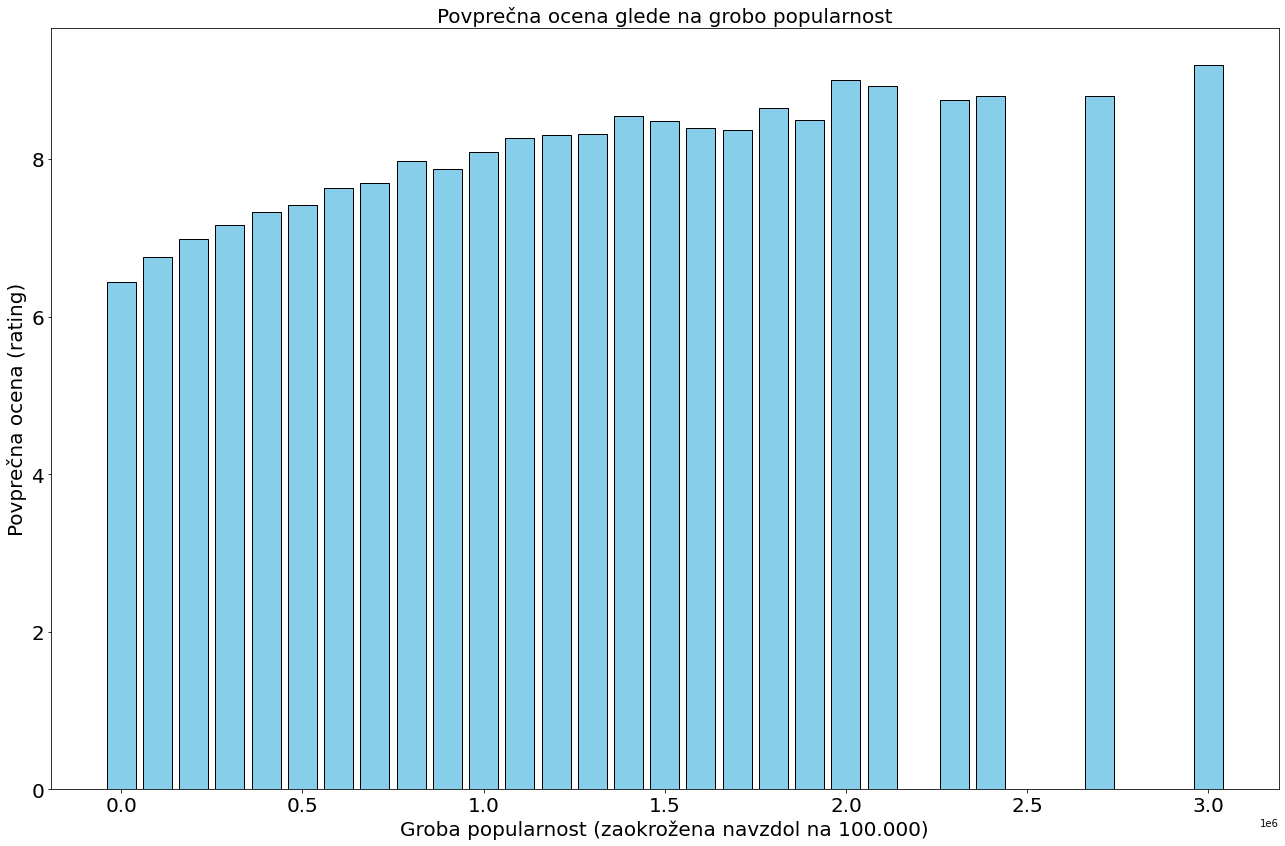

In [ ]:
#6
import pandas as pd
import matplotlib.pyplot as plt

#odpremo datoteko ter ustvarimo novo lastnost podatkov 'groba popularnost', po kateri potem grupiramo podatke
podatki = pd.read_csv('podatki.csv')
podatki['groba-popularnosti'] = (podatki['popularnost'] // 100000) * 100000
grouped = podatki.groupby('groba-popularnosti')['ocena'].mean().reset_index()

#podatke uredimo v graf ki ima na x osi podatek o grobi popularnosti filma in na y osi podatek o oceni filma
plt.figure(figsize=(22, 14))
plt.bar(grouped['groba-popularnosti'], grouped['ocena'], width=80000, color='skyblue', edgecolor='black')
plt.xlabel('Groba popularnost (zaokrožena navzdol na 100.000)', fontsize=20)
plt.ylabel('Povprečna ocena (rating)', fontsize=20)
plt.title('Povprečna ocena glede na grobo popularnost', fontsize=20)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);



Iz grafa je razvidno da po pričakovanjih res obstaja naraščajoča povezava med popularnostjo ter oceno.

<br>

Potem lahko podatke analiziramo in sicer z uporabo sklearn knjiznice.<br>Cilj je napovedati oceno iz naslova, žanr, popularnosti ter cr ocene. <br>Poženemo kodo 7.

In [35]:
#7
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack
import numpy as np

# naloži CSV
df = pd.read_csv("podatki.csv")

# diskretizira 'oceno' v 3 kategorije: 0=Low, 1=Medium, 2=High
bins = [0, 6.5, 8.5, 10]
df['label'] = pd.cut(df['ocena'], bins=bins, labels=[0,1,2]).astype(int)

# pripravi lastnosti
title_vectorizer = CountVectorizer()
genre_vectorizer = CountVectorizer(token_pattern=r'[^,]+')
cr_binarizer = LabelBinarizer()

X_title = title_vectorizer.fit_transform(df['naslov'])
X_genre = genre_vectorizer.fit_transform(df['zanre'])
X_cr = cr_binarizer.fit_transform(df['cr'])
X_pop = df[['popularnost']].values  # as numeric

# združi vse lastnosti v eno
X_all = hstack([X_title, X_genre, X_cr, X_pop])
y = df['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=0)

# trenira model
model = MultinomialNB()
model.fit(X_train, y_train)

# oceni natancnosti modela
y_pred = model.predict(X_test)
print("Natancnost:", accuracy_score(y_test, y_pred))


Natancnost: 0.6310240963855421


Preverimo če deluje na filmu ki ni v začetnem seznamu, tako da poženemo kodo 8.

In [ ]:
#8
new_movie = {
    "naslov": "The count of monte cristo",
    "popularnost": 156000,
    "zanre": "Action, Adventure, Drama",
    "cr": "PG-13"
}

X_new = hstack([
    title_vectorizer.transform([new_movie['naslov']]),
    genre_vectorizer.transform([new_movie['zanre']]),
    cr_binarizer.transform([new_movie['cr']]),
    np.array([[new_movie['popularnost']]])
])

pred = model.predict(X_new)[0]
print("Predvidena ocena:", ["Nizka", "Srednja", "Visoka"][pred])


Predvidena ocena: Srednja
